In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
data = pd.read_csv('10mm_40degree_data.csv')
data.head()

,Time,Min,Max,Avg
0,0.010,24.923,25.422,25.027
1,0.015,24.892,25.487,25.032
2,0.020,24.878,25.655,25.048
3,0.025,24.872,25.780,25.059
4,0.030,24.904,25.965,25.073


In [3]:
#Define the features (X) and the target (y)
X = data[['Time', 'Min', 'Max']]  # Feature columns
y = data['Avg']  # Target column


In [4]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor with regularization
model = RandomForestRegressor(
    n_estimators=100,         # Number of trees
    max_depth=5,              # Limit the depth of each tree
    min_samples_split=10,     # Require at least 10 samples to split a node
    min_samples_leaf=4,       # Require at least 4 samples at each leaf node
    max_features='sqrt',      # Use the square root of the total number of features
    random_state=42           # Set random state for reproducibility
)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, random_state=42)

In [6]:
y_pred = model.predict(X_test)


In [7]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.011518727183264122


In [8]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

     Actual  Predicted
219  30.046  29.894249
66   25.441  25.423081
9    25.146  25.191858
170  25.708  25.866481
15   25.218  25.293133
201  25.724  25.797606
25   25.296  25.321064
197  25.713  25.807667
154  25.639  25.634355
126  25.531  25.521791
216  29.804  29.662117
19   25.264  25.316971
96   25.390  25.356084
178  25.722  25.699760
175  25.719  25.696707
137  25.582  25.603065
146  25.600  25.615386
30   25.349  25.383266
227  29.987  29.953236
185  25.725  25.700430
108  25.421  25.404300
162  25.675  25.687112
206  26.925  26.367202
181  25.722  25.703188
125  25.520  25.500574
18   25.250  25.322019
147  25.602  25.618380
101  25.402  25.401966
104  25.409  25.400503
84   25.394  25.399225
199  25.709  25.901065
60   25.448  25.426501
118  25.477  25.468129
45   25.426  25.548108
16   25.227  25.472676
127  25.537  25.585179
159  25.665  25.682303
119  25.483  25.469161
82   25.398  25.399435
144  25.597  25.612885
93   25.386  25.398426
195  25.716  25.780832
143  25.592

In [9]:

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.011518727183264122
R² Score: 0.9906133737514203


In [10]:
# Get feature importance from the Random Forest model
importance = model.feature_importances_

# Plot feature importance
features = ['Time', 'Min', 'Max']
plt.figure(figsize=(8,6))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()


NameError: name 'plt' is not defined

Linear Regression - Mean Squared Error: 0.041095247632634446, R² Score: 0.9665114275229274
Random Forest - Mean Squared Error: 0.002233917825532038, R² Score: 0.9981795773643485


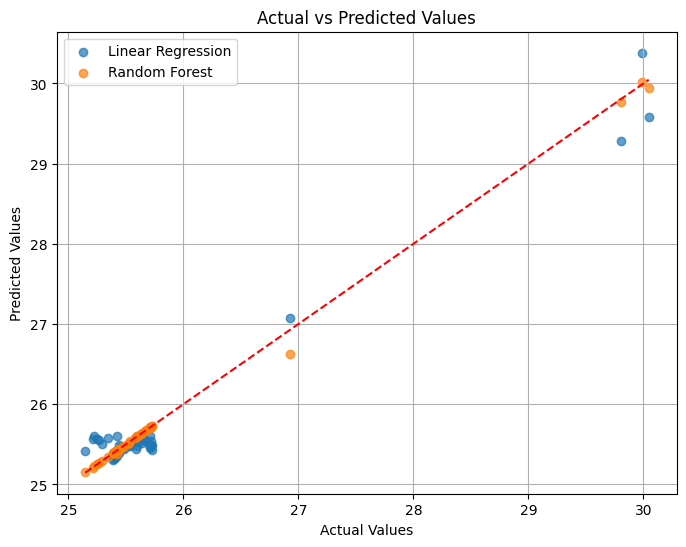

In [12]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your CSV data
data = pd.read_csv('10mm_40degree_data.csv')  # Replace 'your_data.csv' with the actual file path

# Step 2: Define the features (X) and the target (y)
X = data[['Time', 'Min', 'Max']]  # Feature columns
y = data['Avg']  # Target column

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 5: Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions with both models
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Step 7: Evaluate both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation results
print(f"Linear Regression - Mean Squared Error: {mse_linear}, R² Score: {r2_linear}")
print(f"Random Forest - Mean Squared Error: {mse_rf}, R² Score: {r2_rf}")

# Step 8: Plot Actual vs Predicted for both models

# Linear Regression plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear, alpha=0.7, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


The Random Forest Regressor outperforms the Linear Regression model in terms of both Mean Squared Error and R² Score. This shows that the Random Forest is better at capturing the complex relationships between the features and the target variable, making it a more suitable model for this task.